# Sentimental analysis as consumer perception

## Analysis is done for recent milk related tweets in Ireland and France 

In [1]:
#Import library first
import pandas as pd
import nltk


### Get tweets from Ireland

In [2]:
#import library first
import requests
import json
from time import sleep

# please add bearer_token here
bearer_token = "Add bearer token here"

# set limit for the sample
sample_limit =500


# file to save tweeter response
FILE = 'tweet_response_irelandtweet.json'
# twitter search api url
search_url = "https://api.twitter.com/2/tweets/search/recent"
#search_url = "https://api.twitter.com/2/tweets/search/all"

# add query paramters here
#change params based on the endpoint you are using
 
query_params = {'query': 'irish milk lang:en -is:retweet',
                'tweet.fields': 'author_id', 
                'max_results': '99',
                'next_token': {}}

#query_params = {'query': 'ireland milk quality lang:en -is:retweet',
 #               'tweet.fields': 'author_id', 
  #              'max_results': '100',
   #             'next_token': {}}

# function to add request header
def bearer_oauth(r):
    r.headers = {"Authorization": "Bearer {}".format(bearer_token)}
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r
# function to send request and recieve response
def connect_to_endpoint(url, params):
    response = requests.get(url, auth=bearer_oauth, params=params)
    #print(response.status_code)
    # check if response code is good or bad
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()




# main function to get tweets
def get_tweets():
    json_response = connect_to_endpoint(search_url, query_params)
    
    # add try block to catch the error
    try:
        #print(json_response)
        returnVal = json_response["meta"]["result_count"]
        #print("Tweet count is: %s" %  returnVal)
        if returnVal > 0:
            json_response = connect_to_endpoint(search_url, query_params)
            json_file = open(FILE, mode='a')
            
            
            #step up to write the file
            #json_file.write('{"data": [')
            
            
            # get data from json node
            json_file.writelines(json.dumps(json_response["data"])[1:-1])
                
            nextToken =""
            
            for post in json_response:
                # check if meta tag is present the json response
                if 'meta' in post:
                        for d in json_response["meta"]:
                            # print(d)
                            if 'next_token' in d:
                                #   print("Next token value iswewe: %s" % json_response['meta']['next_token'])
                                #print(json_response['meta']['next_token'])
                                nextToken=json_response['meta']['next_token']
                                #if nextToken =="":
                                #print(json_response["meta"]["oldest_id"] +
                                        #      "\n" + json_response["meta"]["newest_id"] +
                                        #      "\n" + json_response["meta"]["next_token"])
                                        #print(json_response["meta"]["next_token"])
                                counter = 0
                                tweets_counter = 0
                                tweets_counter += json_response["meta"]["result_count"]
                                                    #print("Next token value is: %s" % json_response["meta"]["next_token"])
                                                    #print("Next token value is: %s" % json_response["meta"]["result_count"])
                                                    # sample limit is 500, so need only 500 tweets
                                while json_response["meta"]["next_token"] and tweets_counter <= sample_limit:
                                    # sleep for 2 seconds to maintain throttling
                                    sleep(2)
                                    json_response = connect_to_endpoint(search_url, query_params)


                                    json_file.writelines("," + json.dumps(json_response["data"])[1:-1])


                                    #print(json_response["meta"]["oldest_id"] +
                                    #    "\n" + json_response["meta"]["newest_id"] +
                                    #   "\n" + json_response["meta"]["next_token"])

                                    print("Tweet count is: %s" %  tweets_counter)
                                    #print("Next token value is: %s" %  json_response["meta"]["next_token"])
                                    #print(json_response)

                                    counter += 1
                                    tweets_counter += json_response["meta"]["result_count"]

                                #json_file.writelines("]}")


                                json_file.close()
        else:
            print("Tweets not found")
    except Exception as e:
        print("Error! error message is: %s" % str(e))

# check if connected to twitter api successfully
if __name__ == "__main__":
    #below function will extract tweets
    get_tweets()

Tweet count is: 97
Tweet count is: 194
Tweet count is: 291
Tweet count is: 388
Tweet count is: 485


### Get tweet from France

In [3]:
#import library first
import requests
import json
from time import sleep

# please add bearer_token here
bearer_token = "Add bearer token here"

# set limit for the sample
sample_limit =500


# file to save tweeter response
FILE = 'tweet_response_francetweet.json'
# twitter search api url
search_url = "https://api.twitter.com/2/tweets/search/recent"
#search_url = "https://api.twitter.com/2/tweets/search/all"

# add query paramters here
#change params based on the endpoint you are using
 
query_params = {'query': 'french milk lang:en -is:retweet',
                'tweet.fields': 'author_id', 
                'max_results': '99',
                'next_token': {}}

#query_params = {'query': 'ireland milk quality lang:en -is:retweet',
 #               'tweet.fields': 'author_id', 
  #              'max_results': '100',
   #             'next_token': {}}

# function to add request header
def bearer_oauth(r):
    r.headers = {"Authorization": "Bearer {}".format(bearer_token)}
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r
# function to send request and recieve response
def connect_to_endpoint(url, params):
    response = requests.get(url, auth=bearer_oauth, params=params)
    #print(response.status_code)
    # check if response code is good or bad
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()




# main function to get tweets
def get_tweets():
    json_response = connect_to_endpoint(search_url, query_params)
    
    # add try block to catch the error
    try:
        #print(json_response)
        returnVal = json_response["meta"]["result_count"]
        #print("Tweet count is: %s" %  returnVal)
        if returnVal > 0:
            json_response = connect_to_endpoint(search_url, query_params)
            json_file = open(FILE, mode='a')
            
            
            #step up to write the file
            #json_file.write('{"data": [')
            
            
            # get data from json node
            json_file.writelines(json.dumps(json_response["data"])[1:-1])
                
            nextToken =""
            
            for post in json_response:
                # check if meta tag is present the json response
                if 'meta' in post:
                        for d in json_response["meta"]:
                            # print(d)
                            if 'next_token' in d:
                                #   print("Next token value iswewe: %s" % json_response['meta']['next_token'])
                                #print(json_response['meta']['next_token'])
                                nextToken=json_response['meta']['next_token']
                                #if nextToken =="":
                                #print(json_response["meta"]["oldest_id"] +
                                        #      "\n" + json_response["meta"]["newest_id"] +
                                        #      "\n" + json_response["meta"]["next_token"])
                                        #print(json_response["meta"]["next_token"])
                                counter = 0
                                tweets_counter = 0
                                tweets_counter += json_response["meta"]["result_count"]
                                                    #print("Next token value is: %s" % json_response["meta"]["next_token"])
                                                    #print("Next token value is: %s" % json_response["meta"]["result_count"])
                                                    # sample limit is 500, so need only 500 tweets
                                while json_response["meta"]["next_token"] and tweets_counter <= sample_limit:
                                    # sleep for 2 seconds to maintain throttling
                                    sleep(2)
                                    json_response = connect_to_endpoint(search_url, query_params)


                                    json_file.writelines("," + json.dumps(json_response["data"])[1:-1])


                                    #print(json_response["meta"]["oldest_id"] +
                                    #    "\n" + json_response["meta"]["newest_id"] +
                                    #   "\n" + json_response["meta"]["next_token"])

                                    print("Tweet count is: %s" %  tweets_counter)
                                    #print("Next token value is: %s" %  json_response["meta"]["next_token"])
                                    #print(json_response)

                                    counter += 1
                                    tweets_counter += json_response["meta"]["result_count"]

                                #json_file.writelines("]}")


                                json_file.close()
        else:
            print("Tweets not found")
    except Exception as e:
        print("Error! error message is: %s" % str(e))

# check if connected to twitter api successfully
if __name__ == "__main__":
    #below function will extract tweets
    get_tweets()

Tweet count is: 95
Tweet count is: 190
Tweet count is: 285
Tweet count is: 380
Tweet count is: 475


# Sentiment Analysis for Milk Related Tweets in Ireland

In [4]:
# I am using pre-imoported tweet file, this file was extracted on 30.12.2022 at 8.30pm

In [5]:
# import library first
import pandas as pd
# read json file
# Convert JSON File to CSV File
# pandas read JSON File
ireland_df = pd.read_json('tweet_response_Ireland.json', lines=True)
#df.to_csv('courses.csv')

In [6]:
ireland_df.head(2)

text            author_id  \
0  Read Where the Crawdads Sing and gulp down som...  1368800100705734656   
1  40 Br/Irish Fr Spring Calving Heifers (TB4)- U...           1853971129   

                    id edit_history_tweet_ids  
0  1608920248656482304  [1608920248656482304]  
1  1608907547011940352  [1608907547011940354]

In [7]:
ireland_df.shape

(594, 4)

### Data Pre Processing and Cleaning

In [8]:
ireland_df.columns # this will list all the column names

Index(['text', 'author_id', 'id', 'edit_history_tweet_ids'], dtype='object')

In [9]:
ireland_df.head(2)

text            author_id  \
0  Read Where the Crawdads Sing and gulp down som...  1368800100705734656   
1  40 Br/Irish Fr Spring Calving Heifers (TB4)- U...           1853971129   

                    id edit_history_tweet_ids  
0  1608920248656482304  [1608920248656482304]  
1  1608907547011940352  [1608907547011940354]

In [10]:
# Store the column of the dataframe named as "text"
Xval = ireland_df['text']

In [11]:
# Clean text Data

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Luiza
[nltk_data]     Salek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# Store the string.punctuation into an object punct
punct = string.punctuation

# Initialise an object using a method PorterStemmer
stemmer = PorterStemmer()

In [14]:
import re

cleaned_tweet_data=[]

# For loop from first value to length(X), ^a-zA-Z means include small and capital case letters

for i in range(len(Xval)):
    tweet = re.sub('[^a-zA-Z]', ' ', Xval.iloc[i])
    tweet = tweet.lower().split()
    tweet = [stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
    tweet = ' '.join(tweet)
    cleaned_tweet_data.append(tweet)

In [15]:
cleaned_tweet_data

['read crawdad sing gulp milk irish coffe glass',
 'br irish fr spring calv heifer tb uk well grown group spring calv heifer due feb due march april great opportun purchas strong calf heifer boost milk product http co ji nskg gs http co qdnpeqxgj',
 'irish carnyx catharinehoey jamiebrysoncpni hope get poison danger pesticid deregul milk probabl nasti hormon improv beef dread chlorin chicken protectionist racket',
 'heybenjii naughtylilprin nocontextbrit irish even smaller market alot brand food product differ ingredi uk ship food stuff expens make rather import like cadburi chocol tast differ milk tast differ',
 'vegan irish coffe secret ingredi oat milk http co nml xw lbb',
 'vegan irish coffe secret ingredi oat milk http co rctunhxgg',
 'irish teacher get free teabag milk staffroom mani school provid free beverag staff typic someon collect staff http co czmzve wu',
 'nolamaven offer seat someon wait return drink enjoy bourbon milk punch went get irish coffe',
 'break irish teacher ge

In [16]:
# import cleaned tweet to a new data frame
Ire_tweet_df = pd.DataFrame(cleaned_tweet_data, columns = ['tweetText'])

print(Ire_tweet_df)
print(type(Ire_tweet_df))

                                             tweetText
0        read crawdad sing gulp milk irish coffe glass
1    br irish fr spring calv heifer tb uk well grow...
2    irish carnyx catharinehoey jamiebrysoncpni hop...
3    heybenjii naughtylilprin nocontextbrit irish e...
4    vegan irish coffe secret ingredi oat milk http...
..                                                 ...
589  big guy arriv gave irish cream edibl instead m...
590  milk categori provid irish lip dead consider p...
591  irish spirit team would like wish merri christ...
592  today line meat chicken matook irish bread ric...
593  fredsarg ye harvey milk black irish latino tra...

[594 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [17]:
# import library
from textblob import TextBlob

In [18]:
#function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [19]:
#function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [20]:
# get subjectivity and add to new column
Ire_tweet_df["Subjectivity"] = Ire_tweet_df['tweetText'].apply(lambda x: getSubjectivity(x))

In [21]:
# get Polarity and add to new column
Ire_tweet_df["Polarity"] = Ire_tweet_df['tweetText'].apply(lambda x: getPolarity(x))

In [22]:
Ire_tweet_df.head(5)

tweetText  Subjectivity  Polarity
0      read crawdad sing gulp milk irish coffe glass      0.000000  0.000000
1  br irish fr spring calv heifer tb uk well grow...      0.446667  0.196667
2  irish carnyx catharinehoey jamiebrysoncpni hop...      0.475000 -0.300000
3  heybenjii naughtylilprin nocontextbrit irish e...      0.250000  0.000000
4  vegan irish coffe secret ingredi oat milk http...      0.350000 -0.200000

In [23]:
Ire_tweet_df.tail(5)

tweetText  Subjectivity  Polarity
589  big guy arriv gave irish cream edibl instead m...      0.050000  0.000000
590  milk categori provid irish lip dead consider p...      0.200000 -0.100000
591  irish spirit team would like wish merri christ...      0.450000  0.300000
592  today line meat chicken matook irish bread ric...      0.475000 -0.300000
593  fredsarg ye harvey milk black irish latino tra...      0.216667 -0.083333

In [24]:
# create function to analyse the tweet
def Analysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [25]:
# create column and apply the analysis
Ire_tweet_df['twtsentiment'] = Ire_tweet_df['Polarity'].apply(Analysis)

In [26]:
Ire_tweet_df.head(5)

tweetText  Subjectivity  Polarity  \
0      read crawdad sing gulp milk irish coffe glass      0.000000  0.000000   
1  br irish fr spring calv heifer tb uk well grow...      0.446667  0.196667   
2  irish carnyx catharinehoey jamiebrysoncpni hop...      0.475000 -0.300000   
3  heybenjii naughtylilprin nocontextbrit irish e...      0.250000  0.000000   
4  vegan irish coffe secret ingredi oat milk http...      0.350000 -0.200000   

  twtsentiment  
0      neutral  
1     positive  
2     negative  
3      neutral  
4     negative

#### Visualize the tweet polarity result

In [27]:
# assign variables here
totalTweets=0
positive = 0
negative = 0
neutral = 0
# get the value into variable
totalTweets = len(Ire_tweet_df["twtsentiment"])
for twtsentiment in Ire_tweet_df["twtsentiment"]:
    if twtsentiment == "negative":
        negative += 1
    elif twtsentiment == "positive":
        positive += 1
    elif twtsentiment == "neutral":
        neutral += 1

In [28]:
# print the return value
print("total number: ",totalTweets)
print("positive number: ",positive)
print("negative number: ", negative)
print("neutral number: ",neutral)

total number:  594
positive number:  186
negative number:  120
neutral number:  288


In [29]:
# create function to calculate percentage
def percentage(part, whole):
    percentage = 100 * float(part)/float(whole)
    
    return ("{:.2f}".format(percentage))

In [30]:
# calculate percentage
positivePercentage = percentage(positive, totalTweets)
negativePercentage = percentage(negative, totalTweets)
neutralPercentage = percentage(neutral, totalTweets)


In [31]:
# print values here
print("total tweet: ",totalTweets)
print("positive tweet %: ",positivePercentage)
print("negative tweet %: ", negativePercentage)
print("neutral tweet %: ",neutralPercentage)



total tweet:  594
positive tweet %:  31.31
negative tweet %:  20.20
neutral tweet %:  48.48


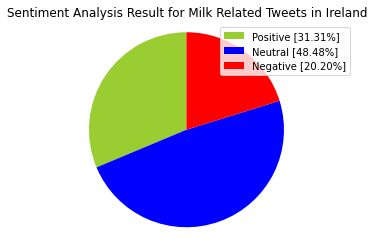

In [32]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

#Creating PieCart
labels = ['Positive ['+str(positivePercentage)+'%]' , 'Neutral ['+str(neutralPercentage)+'%]','Negative ['+str(negativePercentage)+'%]']
sizes = [positivePercentage,neutralPercentage, negativePercentage]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for Milk Related Tweets in Ireland" )
plt.axis('equal')
plt.show()

In [33]:
# Store X the column of the dataframe named as "text"
X = Ire_tweet_df['tweetText']

In [34]:
# Store y the column if the dataframe named as  "airline_sentiment"
y = Ire_tweet_df['twtsentiment']

In [35]:
y.head()

0     neutral
1    positive
2    negative
3     neutral
4    negative
Name: twtsentiment, dtype: object

In [36]:
# Collect all columns into dataframe named as sentiment_ordering
sentiment_ordering = ['negative', 'neutral', 'positive']

# store all values into column named as "y"
y = y.apply(lambda x: sentiment_ordering.index(x))

In [37]:
y.head()

0    1
1    2
2    0
3    1
4    0
Name: twtsentiment, dtype: int64

### Bag of Words using CountVectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate an object cv by calling a method named as CountVectorzer()
cv    = CountVectorizer(max_features = 3000, stop_words = ['milk', 'price'])

# Train the dataset by calling a fit_transform() method
X_fin = cv.fit_transform(X).toarray()

# Display the rows and colums
X_fin.shape

(594, 1014)

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model = MultinomialNB()

In [40]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size = 0.3)

In [41]:
# Train the model by calling a method fit()
model.fit(X_train,y_train)

MultinomialNB()

In [42]:
# Call predict() method
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        55

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



### Feature Generation using TF-IDF

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an object 'tf' by calling a method TfidfVectorizer()
tfidf = TfidfVectorizer(max_features = 3000, stop_words = ['milk', 'price'])

# Train the dataset by calling a method fit_tranform() 
X_tfidf = tfidf.fit_transform(X).toarray()

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model_tdidf = MultinomialNB()

In [46]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3)

In [47]:
# Train the model by calling a method fit()
model_tdidf.fit(X_train, y_train)

MultinomialNB()

In [48]:
# Call predict() method
y_pred = model_tdidf.predict(X_test)

In [49]:
from sklearn.metrics import classification_report

# Instantiate a mathod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.96      1.00      0.98        90
           2       1.00      0.94      0.97        52

    accuracy                           0.98       179
   macro avg       0.99      0.97      0.98       179
weighted avg       0.98      0.98      0.98       179



# Sentiment Analysis for Milk Related Tweets in France

In [50]:
# I am using pre-imoported tweet file, this file was extracted on 31.12.2022 at 11.59pm

In [51]:
# read json file
# Convert JSON File to CSV File
# pandas read JSON File
france_df = pd.read_json('tweet_response_France.json', lines=True)
#df.to_csv('courses.csv')

In [52]:
france_df.head(2)

author_id edit_history_tweet_ids  \
0  1050270810  [1609213267205029890]   
1  1979123587  [1609195247791214595]   

                                                text                   id  
0  "The Drop of Milk in Belleville: The Christmas...  1609213267205029888  
1  French Delight - Café au Lait!: Drown your caf...  1609195247791214592

In [53]:
france_df.shape

(576, 4)

### Data Pre Processing and Cleaning

In [54]:
france_df.columns # this will list all the column names

Index(['author_id', 'edit_history_tweet_ids', 'text', 'id'], dtype='object')

In [55]:
france_df.head(2)

author_id edit_history_tweet_ids  \
0  1050270810  [1609213267205029890]   
1  1979123587  [1609195247791214595]   

                                                text                   id  
0  "The Drop of Milk in Belleville: The Christmas...  1609213267205029888  
1  French Delight - Café au Lait!: Drown your caf...  1609195247791214592

In [56]:
# Store the column of the dataframe named as "text"
Xval = france_df['text']

In [57]:
# Clean text Data

In [58]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Luiza
[nltk_data]     Salek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# Store the string.punctuation into an object punct
punct = string.punctuation

# Initialise an object using a method PorterStemmer
stemmer = PorterStemmer()

In [60]:
import re

cleaned_tweet_data=[]

# For loop from first value to length(X), ^a-zA-Z means include small and capital case letters

for i in range(len(Xval)):
    tweet = re.sub('[^a-zA-Z]', ' ', Xval.iloc[i])
    tweet = tweet.lower().split()
    tweet = [stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
    tweet = ' '.join(tweet)
    cleaned_tweet_data.append(tweet)

In [61]:
cleaned_tweet_data

['drop milk bellevil christma tree dispensari oil canva henri jule jean geoffroy french http co w biohai',
 'french delight caf au lait drown caffein crave oh french delight caf au lait heavenli recip perfect combin steam milk strong hot coffe transport straight http co dwta dcjrr',
 'french cow milk chees petit livarot oz szvjn u http co welwjfjheo http co b qkvfsek',
 'kateatherley use eggnog instead milk make french toast',
 'chines french nft enthusiast golden milk lover introvert bone',
 'carykelli joewbowl plan tri make chees get back farmer market sell raw milk usual sell raw butter done french style slightli ferment delici cheesi butter',
 'holiday menu santa milk amp cooki el amp n hot chocol spice orang amp white chocol french toast http co bseourxkt',
 'thank loui pasteur th centuri french biologist milk drink today contain littl bacteria',
 'cowboyenjoy sound good howev appetit sinc usual drink milk coffe pastri french way',
 'french toast crunch bacon bacon side milk drink

In [62]:
# import cleaned tweet to a new data frame
French_tweet_df = pd.DataFrame(cleaned_tweet_data, columns = ['tweetText'])

print(French_tweet_df)
print(type(French_tweet_df))

                                             tweetText
0    drop milk bellevil christma tree dispensari oi...
1    french delight caf au lait drown caffein crave...
2    french cow milk chees petit livarot oz szvjn u...
3    kateatherley use eggnog instead milk make fren...
4    chines french nft enthusiast golden milk lover...
..                                                 ...
571  miguela nedraza cagovernor wtf give chocol mil...
572  upuouo emmanuelmacron mahnazshirali rant canad...
573  elimin diet drop first pork chicken beef egg w...
574  person arab kona turkish latt almond milk pepp...
575  bela bath amp beauti oatmeal milk amp bran tri...

[576 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [63]:
# import library 
from textblob import TextBlob

In [64]:
#function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [65]:
#function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [66]:
# get subjectivity and add to new column
French_tweet_df["Subjectivity"] = French_tweet_df['tweetText'].apply(lambda x: getSubjectivity(x))

In [67]:
# get Polarity and add to new column
French_tweet_df["Polarity"] = French_tweet_df['tweetText'].apply(lambda x: getPolarity(x))

In [68]:
French_tweet_df.head(5)

tweetText  Subjectivity  Polarity
0  drop milk bellevil christma tree dispensari oi...      0.000000  0.000000
1  french delight caf au lait drown caffein crave...      0.497222  0.313889
2  french cow milk chees petit livarot oz szvjn u...      0.083333 -0.066667
3  kateatherley use eggnog instead milk make fren...      0.000000  0.000000
4  chines french nft enthusiast golden milk lover...      0.250000  0.150000

In [69]:
French_tweet_df.tail(5)

tweetText  Subjectivity  Polarity
571  miguela nedraza cagovernor wtf give chocol mil...      0.500000  0.000000
572  upuouo emmanuelmacron mahnazshirali rant canad...      0.033333  0.000000
573  elimin diet drop first pork chicken beef egg w...      0.516667  0.070000
574  person arab kona turkish latt almond milk pepp...      0.477778 -0.255556
575  bela bath amp beauti oatmeal milk amp bran tri...      0.350000 -0.100000

In [70]:
# function to alnalyse the polarity score
def Analysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [71]:
#apply the tweet polority to a new column
French_tweet_df['twtsentiment'] = French_tweet_df['Polarity'].apply(Analysis)

In [72]:
French_tweet_df.head(5)

tweetText  Subjectivity  Polarity  \
0  drop milk bellevil christma tree dispensari oi...      0.000000  0.000000   
1  french delight caf au lait drown caffein crave...      0.497222  0.313889   
2  french cow milk chees petit livarot oz szvjn u...      0.083333 -0.066667   
3  kateatherley use eggnog instead milk make fren...      0.000000  0.000000   
4  chines french nft enthusiast golden milk lover...      0.250000  0.150000   

  twtsentiment  
0      neutral  
1     positive  
2     negative  
3      neutral  
4     positive

#### Visualize the polarity result

In [73]:
##declare variable here
totalTweets=0
positive = 0
negative = 0
neutral = 0
# fucntion to get data and assign to the variables
totalTweets = len(French_tweet_df["twtsentiment"])
for twtsentiment in French_tweet_df["twtsentiment"]:
    if twtsentiment == "negative":
        negative += 1
    elif twtsentiment == "positive":
        positive += 1
    elif twtsentiment == "neutral":
        neutral += 1

In [74]:
# print results
print("total number: ",totalTweets)
print("positive number: ",positive)
print("negative number: ", negative)
print("neutral number: ",neutral)

total number:  576
positive number:  168
negative number:  144
neutral number:  264


In [75]:
# function to calculate the percentages
def percentage(part, whole):
    percentage = 100 * float(part)/float(whole)
    
    return ("{:.2f}".format(percentage))

In [76]:
# calculate percentage
positivePercentage = percentage(positive, totalTweets)
negativePercentage = percentage(negative, totalTweets)
neutralPercentage = percentage(neutral, totalTweets)

In [77]:
# print values here
print("total tweet: ",totalTweets)
print("positive tweet %: ",positivePercentage)
print("negative tweet %: ", negativePercentage)
print("neutral tweet %: ",neutralPercentage)


total tweet:  576
positive tweet %:  29.17
negative tweet %:  25.00
neutral tweet %:  45.83


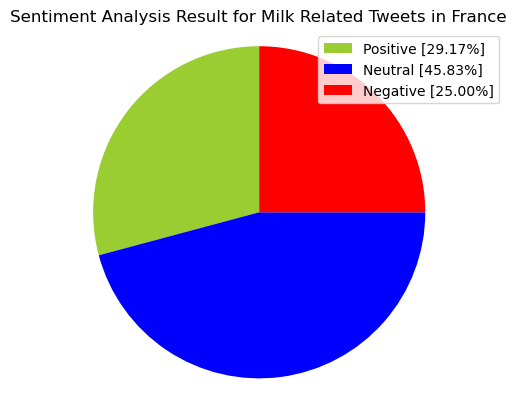

In [78]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

#Creating PieCart
labels = ['Positive ['+str(positivePercentage)+'%]' , 'Neutral ['+str(neutralPercentage)+'%]','Negative ['+str(negativePercentage)+'%]']
sizes = [positivePercentage,neutralPercentage, negativePercentage]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for Milk Related Tweets in France" )
plt.axis('equal')
plt.show()

In [79]:
# Store the column of the dataframe named as "text"
X = French_tweet_df['tweetText']

In [80]:
# Store the column if the dataframe named as  "airline_sentiment"
y = French_tweet_df['twtsentiment']

In [81]:
y.head()

0     neutral
1    positive
2    negative
3     neutral
4    positive
Name: twtsentiment, dtype: object

In [82]:
# Collect all columns into dataframe named as sentiment_ordering
sentiment_ordering = ['negative', 'neutral', 'positive']

# store all values into column named as "y"
y = y.apply(lambda x: sentiment_ordering.index(x))

In [83]:
y.head()

0    1
1    2
2    0
3    1
4    2
Name: twtsentiment, dtype: int64

### Bag of Words using CountVectorizer

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate an object cv by calling a method named as CountVectorzer()
cv    = CountVectorizer(max_features = 3000, stop_words = ['milk', 'price'])

# Train the dataset by calling a fit_transform() method
X_fin = cv.fit_transform(X).toarray()

# Display the rows and colums
X_fin.shape

(576, 877)

In [85]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model = MultinomialNB()

In [86]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size = 0.3)

In [87]:
# Train the model by calling a method fit()
model.fit(X_train,y_train)

MultinomialNB()

In [88]:
# Call predict() method
y_pred = model.predict(X_test)

In [89]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        68

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



### Feature Generation using TF-IDF

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an object 'tf' by calling a method TfidfVectorizer()
tfidf = TfidfVectorizer(max_features = 3000, stop_words = ['milk', 'price'])

# Train the dataset by calling a method fit_tranform() 
X_tfidf = tfidf.fit_transform(X).toarray()

In [91]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model_tdidf = MultinomialNB()

In [92]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3)

In [93]:
# Train the model by calling a method fit()
model_tdidf.fit(X_train, y_train)

MultinomialNB()

In [94]:
# Call predict() method
y_pred = model_tdidf.predict(X_test)

In [95]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.95      1.00      0.98        83
           2       1.00      1.00      1.00        43

    accuracy                           0.98       173
   macro avg       0.98      0.97      0.98       173
weighted avg       0.98      0.98      0.98       173

